(1250, 1)


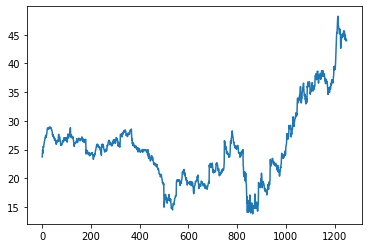

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pandas import read_csv
# 用 pandas 載入數據及截取某一行的數據
# 分析引擎選擇 python,前面8筆資料不取
dataItem = read_csv('yahoo_stock.csv', usecols=[4],
                     engine='python', skiprows=8)
# 讀取dataItem Series 的 value
data = dataItem.values
# 將資料型態轉換成 float32
data = data.astype('float32')
print(data.shape)  # 秀出資料維度
plt.plot(data)   # 以圖表表示出
plt.show()

In [2]:
def GetDataAndLabel(data,TimeStep):
    trainData, trainLabel = [], []
    for i in range(len(data)-TimeStep):
        TrainDataOne = data[i:(i+TimeStep),0]
        trainData.append(TrainDataOne)
        trainLabel.append(data[i+TimeStep,0])
    return np.array(trainData), np.array(trainLabel)

In [3]:
from sklearn.preprocessing import MinMaxScaler
# 將數據歸一化
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

In [4]:
# 將資料切割成訓練集與測試集, 分割比例為 9:1
TrainDataNum = int(len(data) * 0.9)
TestDataNum = len(data) - TrainDataNum
# 前面 0~ TrainDataNum-1 的資料為訓練集
trainData = data[0:TrainDataNum,:]
# 從 TrainDataNum 之後的資料為測試集
testData = data[TrainDataNum:len(data),:]
TimeStep = 6
traindataNew, trainLabelNew = GetDataAndLabel(trainData, TimeStep)
testdataNew, testLabelNew = GetDataAndLabel(testData, TimeStep)
print("traindataNew.shape :",traindataNew.shape)
print("trainLabelNew.shape :",trainLabelNew.shape)
print("testdataNew.shape :",testdataNew.shape)
print("testLabelNew.shape :",testLabelNew.shape)

traindataNew.shape : (1119, 6)
trainLabelNew.shape : (1119,)
testdataNew.shape : (119, 6)
testLabelNew.shape : (119,)


In [5]:
# 將訓練資料與測試資料的維度改為 [batch_size, time_steps, input_dim]
traindataNew = np.reshape(traindataNew,
              (traindataNew.shape[0], traindataNew.shape[1], 1))
testdataNew = np.reshape(testdataNew,
              (testdataNew.shape[0], testdataNew.shape[1], 1))
print("traindataNew.shape :",traindataNew.shape)
print("testdataNew.shape :",testdataNew.shape)

traindataNew.shape : (1119, 6, 1)
testdataNew.shape : (119, 6, 1)


In [6]:
from tensorflow.keras.layers import GRU, Dense
from tensorflow import keras
model = keras.Sequential()
model.add(GRU(128,input_shape=(TimeStep,1),return_sequences=True))
model.add(GRU(64,input_shape=(TimeStep,1)))
model.add(Dense(1))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 6, 128)            50304     
_________________________________________________________________
gru_1 (GRU)                  (None, 64)                37248     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 87,617
Trainable params: 87,617
Non-trainable params: 0
_________________________________________________________________
None


In [7]:
# 模型建立與訓練
model.compile(loss='mean_squared_error',
              optimizer='adam',metrics=['accuracy'])
hist = model.fit(traindataNew,trainLabelNew,
                 epochs=250,batch_size=64,verbose=1)

Epoch 1/250
18/18 [==============================] - 7s 10ms/step - loss: 0.0438 - accuracy: 3.0741e-04
Epoch 2/250
18/18 [==============================] - 0s 8ms/step - loss: 0.0041 - accuracy: 0.0014
Epoch 3/250
18/18 [==============================] - 0s 6ms/step - loss: 8.9006e-04 - accuracy: 0.0029
Epoch 4/250
18/18 [==============================] - 0s 5ms/step - loss: 5.7008e-04 - accuracy: 1.9384e-04
Epoch 5/250
18/18 [==============================] - 0s 5ms/step - loss: 5.0641e-04 - accuracy: 0.0029
Epoch 6/250
18/18 [==============================] - 0s 5ms/step - loss: 4.5605e-04 - accuracy: 5.9619e-04
Epoch 7/250
18/18 [==============================] - 0s 5ms/step - loss: 4.3351e-04 - accuracy: 0.0010
Epoch 8/250
18/18 [==============================] - 0s 5ms/step - loss: 4.1510e-04 - accuracy: 6.8757e-04
Epoch 9/250
18/18 [==============================] - 0s 5ms/step - loss: 4.4543e-04 - accuracy: 0.0010
Epoch 10/250
18/18 [==============================] - 0s 4ms/ste

18/18 [==============================] - 0s 4ms/step - loss: 2.5863e-04 - accuracy: 4.3920e-04
Epoch 79/250
18/18 [==============================] - 0s 4ms/step - loss: 2.4376e-04 - accuracy: 5.1396e-04
Epoch 80/250
18/18 [==============================] - 0s 4ms/step - loss: 2.8156e-04 - accuracy: 0.0021
Epoch 81/250
18/18 [==============================] - 0s 4ms/step - loss: 2.6246e-04 - accuracy: 9.0785e-04
Epoch 82/250
18/18 [==============================] - 0s 4ms/step - loss: 2.9401e-04 - accuracy: 0.0010
Epoch 83/250
18/18 [==============================] - 0s 4ms/step - loss: 2.4347e-04 - accuracy: 0.0014
Epoch 84/250
18/18 [==============================] - 0s 4ms/step - loss: 1.9894e-04 - accuracy: 1.4244e-04
Epoch 85/250
18/18 [==============================] - 0s 4ms/step - loss: 2.1209e-04 - accuracy: 5.1396e-04
Epoch 86/250
18/18 [==============================] - 0s 4ms/step - loss: 2.1257e-04 - accuracy: 3.7067e-04
Epoch 87/250
18/18 [==============================] -

18/18 [==============================] - 0s 4ms/step - loss: 2.5862e-04 - accuracy: 1.9384e-04
Epoch 155/250
18/18 [==============================] - 0s 4ms/step - loss: 1.9689e-04 - accuracy: 0.0029
Epoch 156/250
18/18 [==============================] - 0s 4ms/step - loss: 2.2037e-04 - accuracy: 0.0029
Epoch 157/250
18/18 [==============================] - 0s 4ms/step - loss: 2.5368e-04 - accuracy: 2.4867e-04
Epoch 158/250
18/18 [==============================] - 0s 4ms/step - loss: 2.2701e-04 - accuracy: 7.9036e-04
Epoch 159/250
18/18 [==============================] - 0s 4ms/step - loss: 2.3180e-04 - accuracy: 0.0017
Epoch 160/250
18/18 [==============================] - 0s 4ms/step - loss: 2.0869e-04 - accuracy: 7.9036e-04
Epoch 161/250
18/18 [==============================] - 0s 4ms/step - loss: 2.3113e-04 - accuracy: 4.3920e-04
Epoch 162/250
18/18 [==============================] - 0s 4ms/step - loss: 2.4282e-04 - accuracy: 5.1396e-04
Epoch 163/250
18/18 [========================

18/18 [==============================] - 0s 4ms/step - loss: 2.4207e-04 - accuracy: 9.4069e-05
Epoch 231/250
18/18 [==============================] - 0s 4ms/step - loss: 1.9754e-04 - accuracy: 6.8757e-04
Epoch 232/250
18/18 [==============================] - 0s 4ms/step - loss: 3.1024e-04 - accuracy: 5.1396e-04
Epoch 233/250
18/18 [==============================] - 0s 4ms/step - loss: 2.4705e-04 - accuracy: 0.0012
Epoch 234/250
18/18 [==============================] - 0s 4ms/step - loss: 2.2693e-04 - accuracy: 3.0741e-04
Epoch 235/250
18/18 [==============================] - 0s 4ms/step - loss: 1.9403e-04 - accuracy: 4.3920e-04
Epoch 236/250
18/18 [==============================] - 0s 4ms/step - loss: 2.7910e-04 - accuracy: 6.8757e-04
Epoch 237/250
18/18 [==============================] - 0s 4ms/step - loss: 2.9105e-04 - accuracy: 2.4867e-04
Epoch 238/250
18/18 [==============================] - 0s 4ms/step - loss: 2.3778e-04 - accuracy: 1.4244e-04
Epoch 239/250
18/18 [================

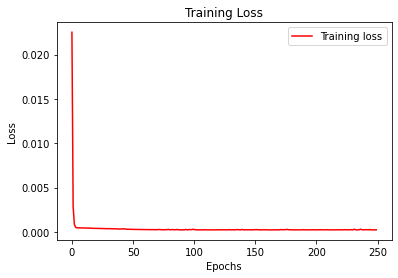

In [8]:
# 繪出每個訓練周期的損失值
loss = hist.history["loss"]
epochs = range(len(loss))
plt.plot(epochs,loss,'r-',label="Training loss")
plt.title('Training Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [9]:
# 重新拿訓練集與測試集來預測股價資訊
trainPredict = model.predict(traindataNew)
testPredict = model.predict(testdataNew)

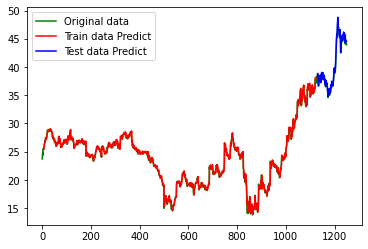

In [11]:
# 將預測資料轉換為原始資料
trainRealPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainLabelNew])
testRealPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testLabelNew])

# 創造一個與原始資料一樣的陣列,
PredtrainingData = np.empty_like(data)
PredtestData = np.empty_like(data)

# 將內部資料設定成 None (空類型)
originaldata = scaler.inverse_transform(data)
PredtrainingData[:, :] = np.nan
PredtestData[:, :] = np.nan
# 訓練集的預測資料是從 TimeStep 時間開始,
# 一直到 len(trainPredict) + TimeStep 結束
PredtrainingData[TimeStep:
             len(trainPredict) + TimeStep, :] = trainRealPredict
# 測試集的預測資料是從訓練集的長度 + (TimeStep * 2)-1時間開始,
# 一直到 len(trainPredict)-1結束
PredtestData[len(trainPredict) + (TimeStep * 2)-1:
         len(data) - 1, :] = testRealPredict
# 繪製原始資料
plt.plot(originaldata,color = 'green',label="Original data")
# 繪製訓練集的預測資料
plt.plot(PredtrainingData, color = 'red',label="Train data Predict")
# 繪製測試集的預測資料
plt.plot(PredtestData, color = 'blue',label="Test data Predict")
plt.legend()
plt.show()